In [18]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from cmd_classes_funcs_Marchese import *

## Use two functions and classes from cmd_classes_funcs_Marchese to make train/valid dataset

In [19]:
# Get classes and filenames
path = Path("data")
classes = get_class_labels(path)
all_filenames = get_filenames(path)

In [20]:
# Getting size of dataset and corresponding list of indices
dataset_size = len(all_filenames)
dataset_indices = list(range(dataset_size))

In [21]:
# Shuffling the indices
np.random.shuffle(dataset_indices)

In [22]:
# Getting index for where we want to split the data
val_split_index = int(np.floor(0.2 * dataset_size))

In [23]:
# Splitting list of indices into training and validation indices
train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]

In [24]:
# Getting list of filenames for training and validation set
train_filenames = [all_filenames[i] for i in train_idx]
val_filenames = [all_filenames[i] for i in val_idx]

In [25]:
# Create training and validation datasets
train_data = ImageWithCmdDataset(classes, train_filenames)
val_data = ImageWithCmdDataset(classes, val_filenames)

In [26]:
# Creating DataLoader
dls = DataLoaders.from_dsets(train_data, val_data)
dls = dls.cuda()

In [27]:
net = MyModel_dnet169()
net

MyModel_dnet169(
  (cnn): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum

In [31]:
learn = Learner(dls, net, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [32]:
# Freeze model to train the head
learn.freeze()

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.00019054606673307717)

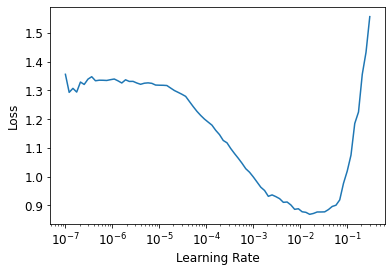

In [33]:
# Find good learning rate
learn.lr_find()

In [34]:
# Train head of model
learn.fit_one_cycle(4, 0.0016)

epoch,train_loss,valid_loss,accuracy,time
0,0.497513,0.476715,0.879199,01:02
1,0.362877,0.313312,0.894925,01:02
2,0.270049,0.227273,0.915654,01:02
3,0.210800,0.177316,0.937813,01:01


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.9054607491852948e-06)

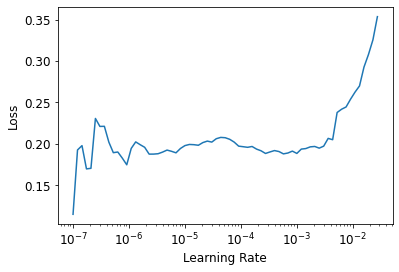

In [35]:
# unfreeze to train the whole model
learn.unfreeze()
learn.lr_find()

In [37]:
learn.fit(50, lr=9.1e-08, cbs=TrackerCallback(monitor='valid_loss', reset_on_fit=True))

epoch,train_loss,valid_loss,accuracy,time
0,0.165678,0.177038,0.937813,01:02
1,0.178323,0.176954,0.937813,01:01
2,0.177783,0.176453,0.937813,01:01
3,0.172614,0.175386,0.937813,01:01
4,0.179793,0.176030,0.937098,01:01
5,0.178752,0.175989,0.937098,01:01
6,0.171612,0.175083,0.939957,01:01
7,0.172076,0.175467,0.938528,01:02
8,0.166980,0.174779,0.938528,01:01
9,0.172305,0.174973,0.939957,01:02


In [ ]:
# maybe try to get a confusion matrix...

In [ ]:
learn.export(os.path.abspath('cmd_fai.pkl'))

In [36]:
PATH = 'cmd_fai_dnet169.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
learn.model

In [ ]:
net = models.resnet18()
net